In [1]:
import pandas as pd
# Function for extracting data from eurostat 

def get_eurostat_datasets(dataset_name):
    csv_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_name}/?format=SDMX-CSV&lang=en&label=label_only"
    return pd.read_csv(csv_url)

In [2]:
# Get frequencies by alcohol consumption datasets

freq_education = get_eurostat_datasets('hlth_ehis_al1e')
freq_income = get_eurostat_datasets('hlth_ehis_al1i')
freq_urbanisation = get_eurostat_datasets('hlth_ehis_al1u')

In [3]:
freq_education.head()

,DATAFLOW,LAST UPDATE,freq,unit,frequenc,isced11,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:HLTH_EHIS_AL1E(1.0),01/04/22 23:00:00,Annual,Percentage,Every day,"Less than primary, primary and lower secondary...",Females,Total,Austria,2014,2.0,NaN
1,ESTAT:HLTH_EHIS_AL1E(1.0),01/04/22 23:00:00,Annual,Percentage,Every day,"Less than primary, primary and lower secondary...",Females,Total,Austria,2019,2.3,NaN
2,ESTAT:HLTH_EHIS_AL1E(1.0),01/04/22 23:00:00,Annual,Percentage,Every day,"Less than primary, primary and lower secondary...",Females,Total,Belgium,2014,7.5,u
3,ESTAT:HLTH_EHIS_AL1E(1.0),01/04/22 23:00:00,Annual,Percentage,Every day,"Less than primary, primary and lower secondary...",Females,Total,Belgium,2019,4.0,NaN
4,ESTAT:HLTH_EHIS_AL1E(1.0),01/04/22 23:00:00,Annual,Percentage,Every day,"Less than primary, primary and lower secondary...",Females,Total,Bulgaria,2014,1.3,NaN


In [4]:
# Drop unnecessary columns
freq_education = freq_education.drop(['freq','unit','DATAFLOW', 'LAST UPDATE'], axis=1)
freq_income = freq_income.drop(['freq','unit','DATAFLOW', 'LAST UPDATE'], axis=1)
freq_urbanisation = freq_urbanisation.drop(['freq','unit','DATAFLOW', 'LAST UPDATE'], axis=1)

# Drop rows with missing OBS_VALUE
freq_education_cleaned = freq_education.dropna(subset=['OBS_VALUE'])
freq_income_cleaned = freq_income.dropna(subset=['OBS_VALUE'])
freq_urbanisation_cleaned = freq_urbanisation.dropna(subset=['OBS_VALUE'])

freq_income_cleaned.head()

,quant_inc,frequenc,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,First quintile,Every day,Females,Total,Austria,2014,1.9,NaN
1,First quintile,Every day,Females,Total,Austria,2019,3.4,NaN
2,First quintile,Every day,Females,Total,Belgium,2014,7.7,u
3,First quintile,Every day,Females,Total,Belgium,2019,6.7,NaN
4,First quintile,Every day,Females,Total,Bulgaria,2014,2.2,NaN


**Grouping the frequency into broader categories**:  

**Frequent drinkers**: 'Every day', 'Every week'  
**Occasional drinkers**: 'Every month', 'Less than once a month'  
**Non-drinkers**: 'Never', 'Not in the last 12 months'

In [5]:
def simplify_frequenc(df):
    df_copy = df.copy() 
    df_copy['frequenc_simplified'] = df_copy['frequenc'].replace({
        'Every day': 'Frequent drinkers',
        'Every week': 'Frequent drinkers',
        'Every month': 'Occasional drinkers',
        'Less than once a month': 'Occasional drinkers',
        'Never': 'Non-drinkers',
        'Not in the last 12 months': 'Non-drinkers',
        'Never or not in the last 12 months': 'Non-drinkers'
    })
    return df_copy

freq_education_cleaned = simplify_frequenc(freq_education_cleaned)
freq_income_cleaned = simplify_frequenc(freq_income_cleaned)
freq_urbanisation_cleaned = simplify_frequenc(freq_urbanisation_cleaned)

freq_income_cleaned.head()

,quant_inc,frequenc,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,frequenc_simplified
0,First quintile,Every day,Females,Total,Austria,2014,1.9,NaN,Frequent drinkers
1,First quintile,Every day,Females,Total,Austria,2019,3.4,NaN,Frequent drinkers
2,First quintile,Every day,Females,Total,Belgium,2014,7.7,u,Frequent drinkers
3,First quintile,Every day,Females,Total,Belgium,2019,6.7,NaN,Frequent drinkers
4,First quintile,Every day,Females,Total,Bulgaria,2014,2.2,NaN,Frequent drinkers


In [6]:
print(freq_income_cleaned['OBS_FLAG'].unique())

[nan 'u' 'e' 'd']


**Meanings of the flags:**

u: low reliability  
e: estimated  
d: definition differs (see metadata)  
du: definition differs (see metadata), low reliability

In [14]:
austria_data = freq_income_cleaned[ 
                 (freq_income_cleaned['TIME_PERIOD'] == 2019) & 
                 (freq_income_cleaned['geo'] == 'Austria')]

austria_data.head(10)

,quant_inc,frequenc,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,frequenc_simplified
1,First quintile,Every day,Females,Total,Austria,2019,3.4,NaN,Frequent drinkers
63,First quintile,Every day,Females,From 15 to 19 years,Austria,2019,0.0,u,Frequent drinkers
124,First quintile,Every day,Females,From 15 to 24 years,Austria,2019,0.0,NaN,Frequent drinkers
186,First quintile,Every day,Females,From 15 to 29 years,Austria,2019,0.0,NaN,Frequent drinkers
248,First quintile,Every day,Females,From 15 to 64 years,Austria,2019,1.5,NaN,Frequent drinkers
310,First quintile,Every day,Females,From 18 to 24 years,Austria,2019,0.0,NaN,Frequent drinkers
403,First quintile,Every day,Females,From 18 to 64 years,Austria,2019,1.5,NaN,Frequent drinkers
465,First quintile,Every day,Females,From 20 to 24 years,Austria,2019,0.0,NaN,Frequent drinkers
526,First quintile,Every day,Females,From 25 to 29 years,Austria,2019,0.0,NaN,Frequent drinkers
587,First quintile,Every day,Females,From 25 to 34 years,Austria,2019,0.0,NaN,Frequent drinkers


In [7]:
# Filtering the DataFrame based on the specified conditions
filtered_df = freq_income_cleaned[(freq_income_cleaned['sex'] == 'Total') & 
                 (freq_income_cleaned['age'] == 'Total') & 
                 (freq_income_cleaned['TIME_PERIOD'] == 2019) & 
                 (freq_income_cleaned['frequenc_simplified'] == 'Frequent drinkers') & 
                 (freq_income_cleaned['geo'] == 'European Union - 27 countries (from 2020)')]

filtered_df.head(10)

,quant_inc,frequenc,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,frequenc_simplified
2371,First quintile,Every day,Total,Total,European Union - 27 countries (from 2020),2019,7.0,NaN,Frequent drinkers
23521,First quintile,Every week,Total,Total,European Union - 27 countries (from 2020),2019,21.7,NaN,Frequent drinkers
27046,Second quintile,Every day,Total,Total,European Union - 27 countries (from 2020),2019,8.4,NaN,Frequent drinkers
48196,Second quintile,Every week,Total,Total,European Union - 27 countries (from 2020),2019,24.3,NaN,Frequent drinkers
51721,Third quintile,Every day,Total,Total,European Union - 27 countries (from 2020),2019,9.0,NaN,Frequent drinkers
72871,Third quintile,Every week,Total,Total,European Union - 27 countries (from 2020),2019,28.5,NaN,Frequent drinkers
76396,Fourth quintile,Every day,Total,Total,European Union - 27 countries (from 2020),2019,8.9,NaN,Frequent drinkers
97546,Fourth quintile,Every week,Total,Total,European Union - 27 countries (from 2020),2019,32.7,NaN,Frequent drinkers
101071,Fifth quintile,Every day,Total,Total,European Union - 27 countries (from 2020),2019,9.7,NaN,Frequent drinkers
122221,Fifth quintile,Every week,Total,Total,European Union - 27 countries (from 2020),2019,37.4,NaN,Frequent drinkers


In [8]:
# Aggregating the OBS_VALUE by income level
aggregated_df = filtered_df.groupby('quant_inc')['OBS_VALUE'].mean().reset_index()

aggregated_df = aggregated_df.sort_values(by='OBS_VALUE', ascending=True)

# Visualize the aggregated data
plt.figure(figsize=(8, 6))
plt.bar(aggregated_df['quant_inc'], aggregated_df['OBS_VALUE'])
plt.title('Proportion of Frequent Drinkers by Income Level in the EU (2019)\n\nFrequent Drinkers: Those Who Drink Every Day or Every Week')
plt.xlabel('Income Levels')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [125]:
filtered_df2 = freq_income_cleaned[(freq_income_cleaned['age'] == 'Total') & 
                 (freq_income_cleaned['TIME_PERIOD'] == 2019) & 
                 (freq_income_cleaned['frequenc_simplified'] == 'Frequent drinkers') & 
                 (freq_income_cleaned['geo'] == 'European Union - 27 countries (from 2020)')]

# Grouping by income level and sex, unstacking the 'sex' column for easy plotting
grouped_df = filtered_df2.groupby(['quant_inc', 'sex'])['OBS_VALUE'].mean().unstack()

grouped_df.head()

sex,Females,Males,Total
quant_inc,,,
Fifth quintile,18.10,28.55,23.55
First quintile,9.55,20.20,14.35
Fourth quintile,14.75,26.75,20.80
Second quintile,10.80,23.25,16.35
Third quintile,12.90,25.05,18.75


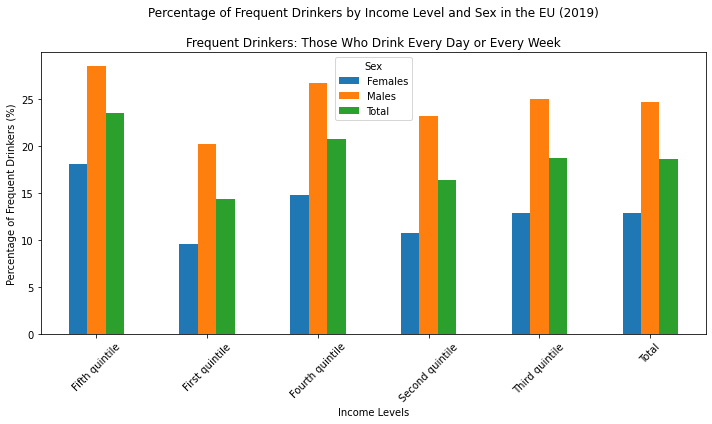

In [128]:
# Plotting the grouped data
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Frequent Drinkers by Income Level and Sex in the EU (2019)\n\nFrequent Drinkers: Those Who Drink Every Day or Every Week')
plt.xlabel('Income Levels')
plt.ylabel('Percentage of Frequent Drinkers (%)')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

In [132]:
# Define a function to find countries with 'd' or 'du' flags
def find_non_comparable_countries(df):
    non_comparable_df = df[df['OBS_FLAG'].isin(['d', 'du'])]
    non_comparable_countries = non_comparable_df['geo'].unique()
    return non_comparable_countries

# Apply the function to each dataset
datasets = {
    'Income': freq_income_cleaned,
    'Education': freq_education_cleaned,
    'Urbanisation': freq_urbanisation_cleaned
}

# Iterate through each dataset and print the non-comparable countries
for dataset_name, df in datasets.items():
    countries = find_non_comparable_countries(df)
    print(f"Countries with 'd' or 'du' OBS_FLAG in {dataset_name} dataset:", countries)

Countries with 'd' or 'du' OBS_FLAG in Income dataset: ['Italy']
Countries with 'd' or 'du' OBS_FLAG in Education dataset: ['Italy']
Countries with 'd' or 'du' OBS_FLAG in Urbanisation dataset: ['Italy']


**Should we delete Italy from the data or use only EU Total values ('European Union - 27 countries (from 2020)')?**